# <center> Depth of Customer Relationship </center>
#    <center> Using Recency, Frequency and Monetary Value </center>

It is common for businesses to want to know the value of a customer to the business and potential income they can generate. There are many metrics to measure these interests. One technique that has gained popularity is RFM.

In this project, I'll be using the KMeans Clustering technique to do unsupervised machine learning to classify consumers according to how they affect the flow of income.

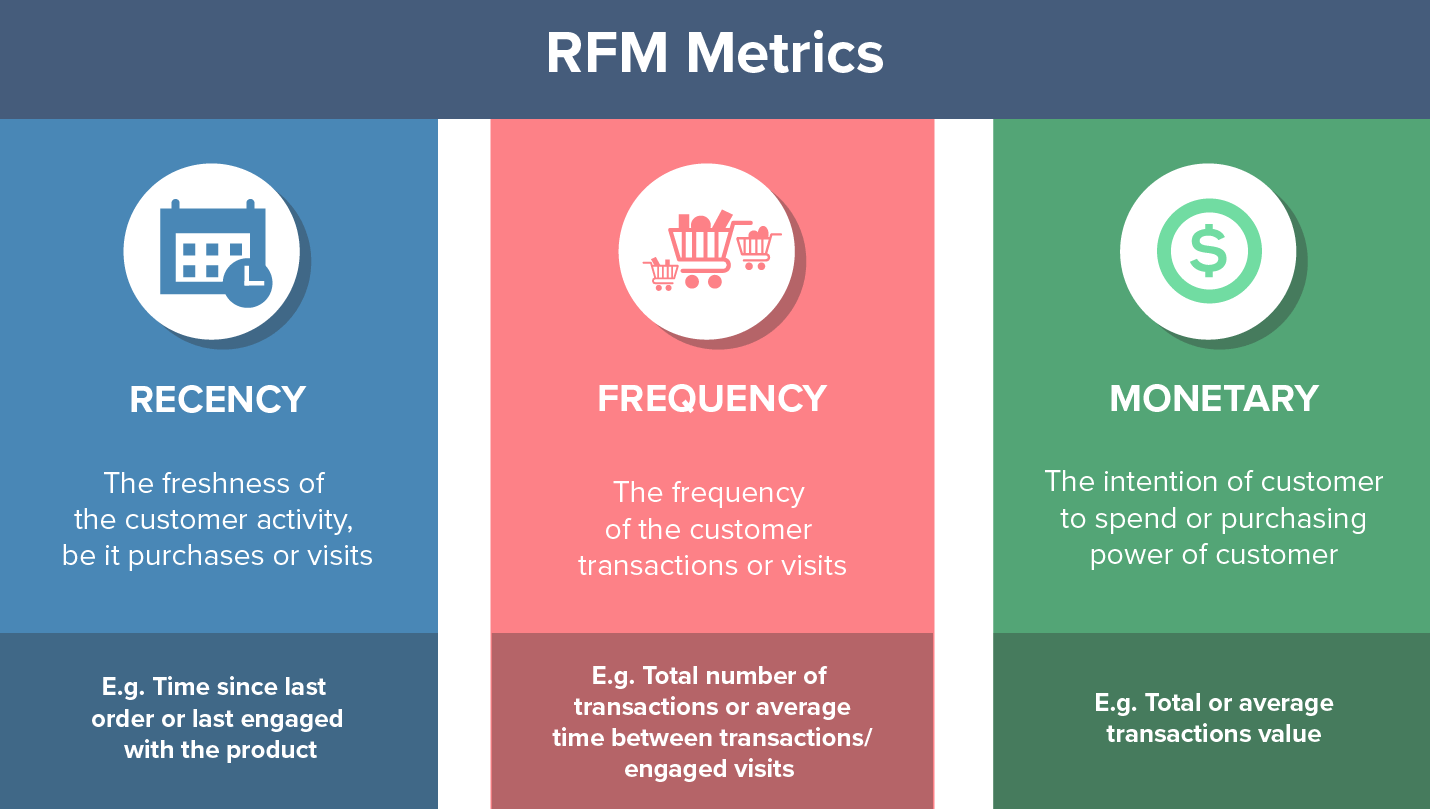

* Recency: sales people desire to always be 'in the face' of the customer. In a way, recency shows that you're at the top of your customer's mind.

* Frequency: businesses like repeat purchases. Many businesses are sustained by returning customers. Companies built around subscription models come to mind. This is why many companies reward customer loyalty.

* Monetary Value: This measures your share of the customer's wallet.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#import dataset
data=pd.read_csv("OnlineRetail.csv", encoding='unicode-escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#To get a brief insight into the datatype of each column and no of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#Observe that there are missing values in the CustomerID column. To fix it,
data = data[data.CustomerID.notna()]

#A reduction has occured and it reflects in the shape of the dataset
data.shape

(406829, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
#There is a need to change the data type of InvoiceDate and CustomerID from object to datetype and object

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
data['CustomerID'] = data.CustomerID.astype('Int64').astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
#Being that I will be exploring the Monetary impact of the customers, I will go on to create a new column
#SaleValue = Quantity * UnitPrice
data["SaleValue"]=data['Quantity']*data['UnitPrice']
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [9]:
#To get a brief statistical understanding of the data set,
data.describe()

,Quantity,UnitPrice,SaleValue
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854
std,248.693370,69.315162,427.591718
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


In [10]:
#Next I'll calculate the recency, frequency and monetary values of each customer.


# Calculate Recency

To obtain the recency of each customer, first we identify maximum value in the InvoiceDate column

In [11]:
data.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [12]:
#Some customers might have multiple purchases on the website hence their id will occur multiple times
#I'll be grouping each customer by their most recent purchase
data.groupby(['CustomerID']).InvoiceDate.max()

CustomerID
12346   2011-01-18 10:17:00
12347   2011-12-07 15:52:00
12348   2011-09-25 13:13:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-12-02 11:43:00
18283   2011-12-06 12:02:00
18287   2011-10-28 09:29:00
Name: InvoiceDate, Length: 4372, dtype: datetime64[ns]

In [13]:
#This shows us that there are 4372 unique customers and now we have a new series for recency.
recency = data.groupby(['CustomerID']).InvoiceDate.max()
recency.head(2)

CustomerID
12346   2011-01-18 10:17:00
12347   2011-12-07 15:52:00
Name: InvoiceDate, dtype: datetime64[ns]

In [14]:
#Next, I'll calculate the recency in respect to number of days ie when was the last time a customer visited the website
recency = recency-data.InvoiceDate.max()
recency.head(2)

CustomerID
12346   -326 days +21:27:00
12347     -2 days +03:02:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [15]:
#Extracting only the days,
recency = recency.dt.days

In [16]:
recency.head()

CustomerID
12346   -326
12347     -2
12348    -75
12349    -19
12350   -310
Name: InvoiceDate, dtype: int64

In [17]:
recency.rename('Recency', inplace=True)
recency.head()

CustomerID
12346   -326
12347     -2
12348    -75
12349    -19
12350   -310
Name: Recency, dtype: int64

In [18]:
#Next I create a DataFrame to host Recency values
RFM=pd.DataFrame(recency)

In [19]:
#Being that the CustomerID ought to be a column of its own, I'll reset the index
RFM.reset_index(inplace=True)
RFM.head()

,CustomerID,Recency
0,12346,-326
1,12347,-2
2,12348,-75
3,12349,-19
4,12350,-310


In [20]:
RFM.describe()

,Recency
count,4372.000000
mean,-92.043001
std,100.765435
min,-374.000000
25%,-143.000000
50%,-50.000000
75%,-17.000000
max,0.000000


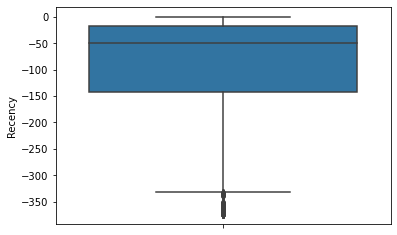

In [21]:
#plot Recency data as boxplot
sns.boxplot(y='Recency',data=RFM)

plt.show()

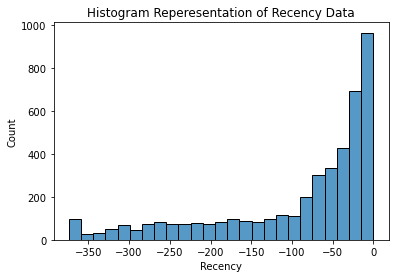

In [22]:
#represent Recency Data using a histogram
sns.histplot(data=RFM["Recency"])
plt.title('Histogram Reperesentation of Recency Data')

plt.show()

# Calculate Frequency

To obtain the frequency of each customer, first we identify the number of times their CustomerID appeared in the dataset

In [23]:
data.groupby('CustomerID').CustomerID.count()

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Name: CustomerID, Length: 4372, dtype: int64

In [24]:
frequency=data.groupby('CustomerID').CustomerID.count()
frequency.rename('Frequency',inplace=True)
frequency.head(2)

CustomerID
12346      2
12347    182
Name: Frequency, dtype: int64

In [25]:
RFM=RFM.merge(frequency,on='CustomerID')
RFM.head(4)

,CustomerID,Recency,Frequency
0,12346,-326,2
1,12347,-2,182
2,12348,-75,31
3,12349,-19,73


In [26]:
RFM.describe()

,Recency,Frequency
count,4372.000000,4372.000000
mean,-92.043001,93.053294
std,100.765435,232.471608
min,-374.000000,1.000000
25%,-143.000000,17.000000
50%,-50.000000,42.000000
75%,-17.000000,102.000000
max,0.000000,7983.000000


In [27]:
RFM.corr()
#there is a weak correlation/relationship between frequency and recency 

,Recency,Frequency
Recency,1.000000,0.206974
Frequency,0.206974,1.000000


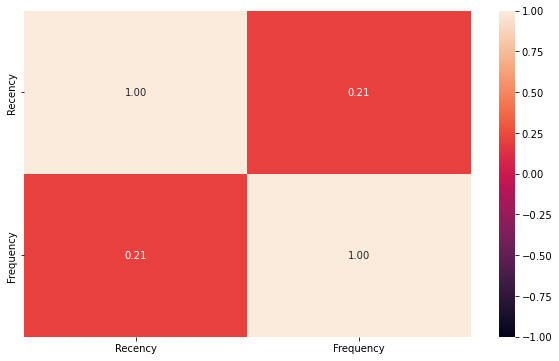

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(RFM.corr(),annot=True,vmax=1,vmin=-1,fmt='.2f')
plt.show()

#this graph confirms our correlation analysis above

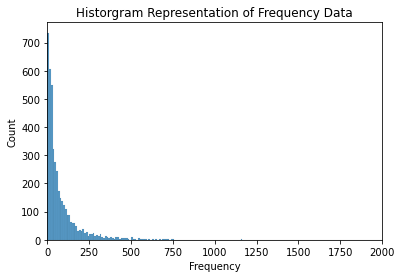

In [29]:
#histogram representation of the frequency data
sns.histplot(data=RFM['Frequency'])
plt.xlim(0,2000)
plt.title('Historgram Representation of Frequency Data')
plt.show()

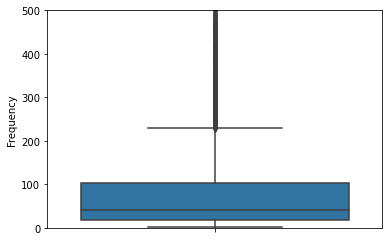

In [30]:
sns.boxplot(y="Frequency",data=RFM)
plt.ylim(0,500)

plt.show()

# Calculate Monetary

To obtain the monetary value of each customer, first we identify total SalesValue their CustomerID generated

In [31]:
data.groupby('CustomerID').SaleValue.sum()

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: SaleValue, Length: 4372, dtype: float64

In [32]:
monetary=data.groupby('CustomerID').SaleValue.sum()
monetary.head()

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
Name: SaleValue, dtype: float64

In [33]:
monetary.rename("Monetary", inplace=True)

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: Monetary, Length: 4372, dtype: float64

In [34]:
#add Monetary to the dataframe
RFM=RFM.merge(monetary, on="CustomerID")
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,-326,2,0.00
1,12347,-2,182,4310.00
2,12348,-75,31,1797.24
3,12349,-19,73,1757.55
4,12350,-310,17,334.40


In [35]:
RFM.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,-92.043001,93.053294,1898.459701
std,100.765435,232.471608,8219.345141
min,-374.000000,1.000000,-4287.630000
25%,-143.000000,17.000000,293.362500
50%,-50.000000,42.000000,648.075000
75%,-17.000000,102.000000,1611.725000
max,0.000000,7983.000000,279489.020000


In [36]:
RFM[RFM.Monetary==-4287.63]

,CustomerID,Recency,Frequency,Monetary
3756,17448,-145,1,-4287.63


In [37]:
data[data.CustomerID=="17448"]
#the user with the minimum monetary value made a return on their purchase

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448,United Kingdom,-4287.63


In [38]:
data[data.CustomerID=='12346']

#customers who made returns had a zero monetary value

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.6


In [39]:
RFM.corr()

,Recency,Frequency,Monetary
Recency,1.000000,0.206974,0.132001
Frequency,0.206974,1.000000,0.446622
Monetary,0.132001,0.446622,1.000000


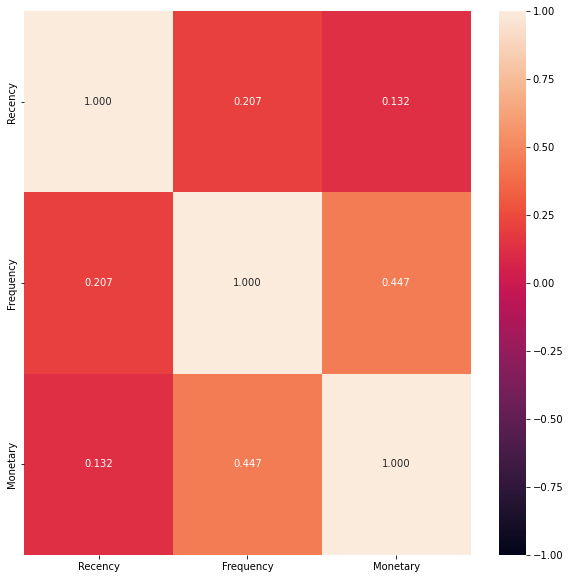

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(RFM.corr(),annot=True,vmin=-1,vmax=1,fmt='.3f')
plt.show()


#  Clustering With Kmeans
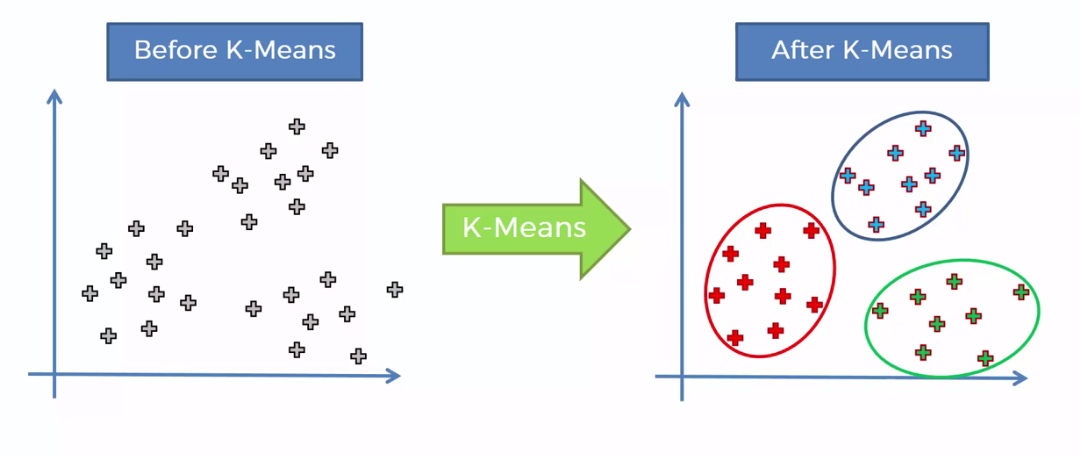
In this phase, I will be grouping the customers into 5 different cluster groups. This number is based on my own volution. There are methods to determinethe optimal cluster numbers which I shall explore towards the end of this project.
The necessary libarries have been imported, I'll begin implementation now.

In [41]:
kmeans=KMeans(n_clusters=5, random_state=1)

In [42]:
#order cluster method
#This function is used to create a consistent order for the cluster numbers that will be the output of the KMeans prediction.
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

### Recency Clusters

In [43]:
#fit the data for training
kmeans.fit(RFM[['Recency']])

KMeans(n_clusters=5, random_state=1)

In [44]:
#predict outcomes from the training
recency_score=kmeans.predict(RFM[["Recency"]])

In [45]:
#view the recency labels creates ie the unique labels/groups/categories created
#creating a set instead of .unique is more efficient because a set only return unique values as it does not allow for repitition
set(recency_score)

{0, 1, 2, 3, 4}

In [46]:
#add recency_score to the RFM dataframe
RFM["Recency Score"]=recency_score
RFM.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score
0,12346,-326,2,0.00,3
1,12347,-2,182,4310.00,0
2,12348,-75,31,1797.24,4
3,12349,-19,73,1757.55,0
4,12350,-310,17,334.40,3


In [47]:
#to ensure that the recencys core aligns with the recency ie reorder th recency score
RFM =order_cluster('Recency Score', 'Recency',RFM,True)

In [48]:
#explore the new data
RFM.groupby('Recency Score').Recency.describe()

,count,mean,std,min,25%,50%,75%,max
Recency Score,,,,,,,,
0,303.0,-336.283828,26.971753,-374.0,-365.0,-331.0,-312.0,-292.0
1,442.0,-246.513575,25.619420,-291.0,-267.0,-247.0,-223.5,-202.0
2,532.0,-156.443609,25.568832,-201.0,-178.0,-156.0,-134.0,-114.0
3,1044.0,-70.369732,18.650422,-113.0,-82.0,-67.0,-54.0,-44.0
4,2051.0,-16.999025,11.969433,-43.0,-26.0,-16.0,-7.0,0.0


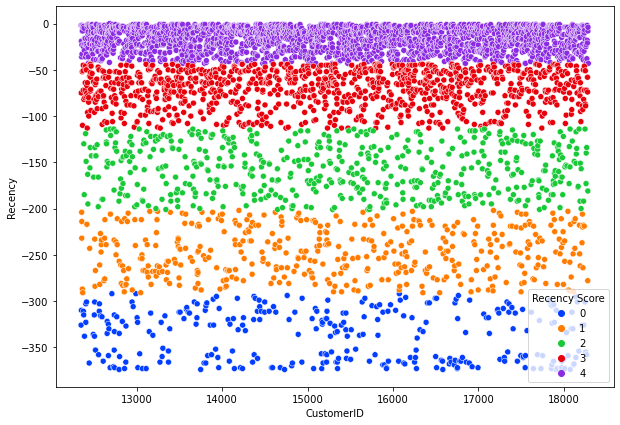

In [49]:
#Visualize the data
plt.figure(figsize=(10,7))
sns.scatterplot(x=RFM.CustomerID.astype(int), y="Recency",hue="Recency Score", data=RFM, palette="bright")

plt.show()

### Frequency Cluster

In [50]:
#fit the model
kmeans.fit(RFM[['Frequency']])

KMeans(n_clusters=5, random_state=1)

In [51]:
#predict frequency score
frequency_score=kmeans.predict(RFM[["Frequency"]])

In [52]:
#add the frequency_score to RFM
RFM["Frequency Score"]=frequency_score

In [53]:
#reorder the cluster
RFM=order_cluster('Frequency Score', 'Frequency',RFM,True)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score
0,12346,-326,2,0.00,0,0
1,12350,-310,17,334.40,0,0
2,12373,-311,14,364.60,0,0
3,12377,-315,77,1628.12,0,0
4,12386,-338,10,401.90,0,0


In [54]:
#get the statistical information
RFM.groupby('Frequency Score').Frequency.describe()

,count,mean,std,min,25%,50%,75%,max
Frequency Score,,,,,,,,
0,3277.0,34.337504,26.361525,1.0,13.00,28.0,51.0,101.0
1,866.0,170.146651,56.638151,102.0,123.00,154.0,208.0,312.0
2,203.0,456.541872,126.962074,313.0,356.50,420.0,517.5,898.0
3,22.0,1392.000000,510.778584,925.0,1064.75,1162.5,1607.0,2782.0
4,4.0,5914.000000,1473.845537,4642.0,5006.50,5515.5,6423.0,7983.0


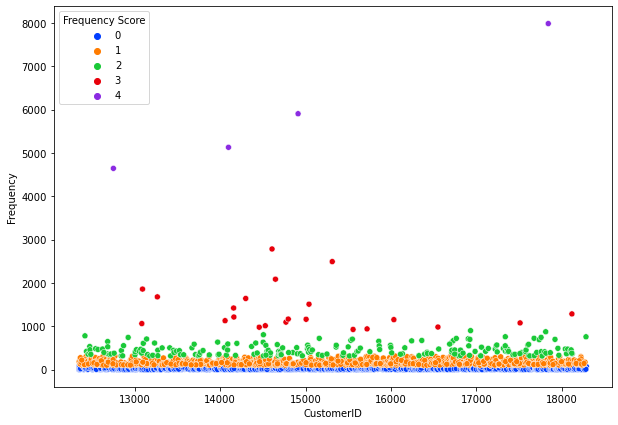

In [55]:
#Visualize the data
plt.figure(figsize=(10,7))
sns.scatterplot(x=RFM.CustomerID.astype(int),y='Frequency',hue='Frequency Score',data=RFM,palette='bright')
plt.show()

### Monetary Clusters

In [56]:
#fit the model
kmeans.fit(RFM[['Monetary']])

#Predict the clusters
monetary_score=kmeans.predict(RFM[['Monetary']])

#add it to the dataframe
RFM['Monetary Score']=monetary_score

#reorder the score
RFM=order_cluster('Monetary Score','Monetary',RFM,True)
RFM.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score
0,12346,-326,2,0.00,0,0,0
1,12350,-310,17,334.40,0,0,0
2,12373,-311,14,364.60,0,0,0
3,12377,-315,77,1628.12,0,0,0
4,12386,-338,10,401.90,0,0,0


In [57]:
#get a statistical insight
RFM.groupby('Monetary Score').Monetary.describe()

,count,mean,std,min,25%,50%,75%,max
Monetary Score,,,,,,,,
0,4073.0,948.451054,968.718422,-4287.63,271.8500,594.900,1308.4800,4531.34
1,265.0,8115.962038,3762.434618,4582.64,5423.1500,6748.400,9623.3500,21535.90
2,27.0,40928.794815,13322.664031,25748.35,28865.4900,33805.690,52287.2800,65892.08
3,5.0,129057.952000,36658.292209,88125.38,113384.1400,123725.450,132572.6200,187482.17
4,2.0,267963.755000,16299.186073,256438.49,262201.1225,267963.755,273726.3875,279489.02


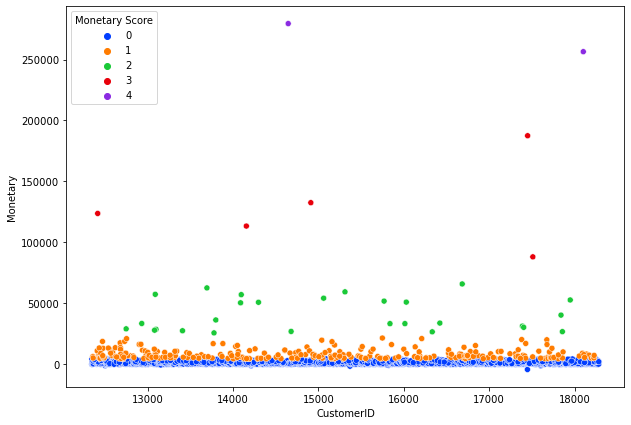

In [58]:
#visualise the data using a scatterplot
plt.figure(figsize=(10,7))
sns.scatterplot(x=RFM.CustomerID.astype(int),y='Monetary',hue='Monetary Score',data=RFM,palette='bright')
plt.show()

 ## Overall Score

In [59]:
#Create a new column, Overall Score which is the Frequency Score, Recency Score, and Monetary Score.
#sum(axis=1) implies that the addition should be done horizontally or in rows
RFM["Overall Score"]=RFM[['Recency Score','Frequency Score', 'Monetary Score']].sum(axis=1)
RFM.head(2)

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,Overall Score
0,12346,-326,2,0.0,0,0,0,0
1,12350,-310,17,334.4,0,0,0,0


In [60]:
RFM['Overall Score'].value_counts()

4     1318
3      916
5      567
2      495
1      438
0      295
6      205
7      103
8       21
10       6
9        6
11       2
Name: Overall Score, dtype: int64

In [61]:
#get a statistical insight of the data
RFM["Overall Score"].describe()


count    4372.000000
mean        3.325252
std         1.703314
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max        11.000000
Name: Overall Score, dtype: float64

In [62]:
RFM.groupby('Overall Score').Monetary.describe()

,count,mean,std,min,25%,50%,75%,max
Overall Score,,,,,,,,
0,295.0,283.426576,352.479252,-1192.20,120.1250,216.760,364.9350,2661.24
1,438.0,417.695685,482.419071,-141.48,162.4000,298.835,463.6575,4464.10
2,495.0,597.067699,1150.962454,-4287.63,195.3200,363.650,704.2100,21535.90
3,916.0,776.044828,853.248032,-1165.30,286.5275,535.955,1000.7450,9861.38
4,1318.0,989.362937,948.979302,-17.45,342.7000,695.230,1319.5850,11581.80
5,567.0,2409.891252,1648.306158,272.44,1322.7550,2144.530,3085.4850,12393.70
6,205.0,6004.876488,5443.288889,1052.55,3095.0400,4788.770,6336.2900,52750.84
7,103.0,11587.752136,10125.943650,3047.63,6222.7750,8234.800,12414.3700,65892.08
8,21.0,20418.507143,18054.444607,4678.30,7454.0700,10641.600,28658.8800,62653.10


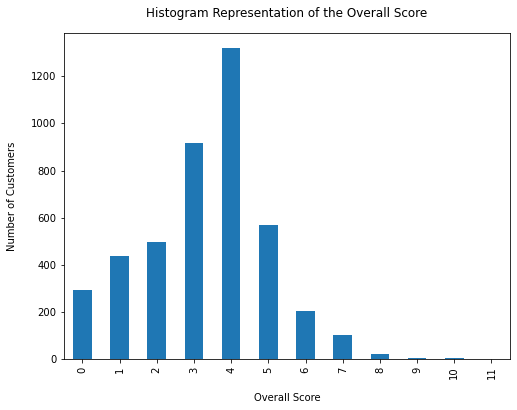

In [63]:
#represent the data with a barplot
RFM['Overall Score'].value_counts().sort_index().plot(kind='bar',figsize=(8, 6))
plt.ylabel('Number of Customers', labelpad=14)
plt.xlabel('Overall Score',labelpad=14)
plt.title('Histogram Representation of the Overall Score',y=1.03)
plt.show()

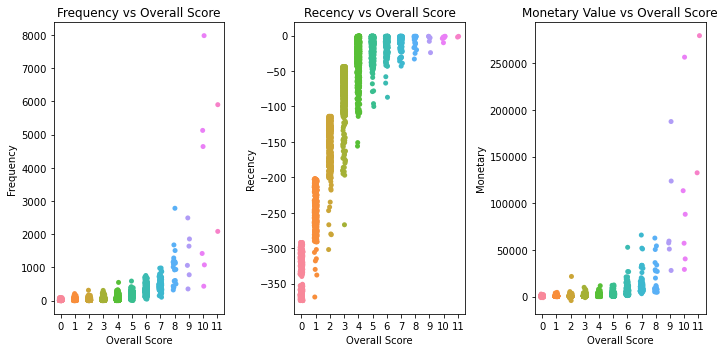

In [64]:
fig,ax=plt.subplots(1,3,figsize=(10,5))

ax[0] = sns.stripplot(y='Frequency',x='Overall Score',data = RFM, ax=ax[0])
ax[0].set_title('Frequency vs Overall Score')

ax[1] = sns.stripplot(y='Recency',x='Overall Score',data = RFM, ax=ax[1])
ax[1].set_title('Recency vs Overall Score')

ax[2] = sns.stripplot(y='Monetary',x='Overall Score',data = RFM, ax=ax[2])
ax[2].set_title('Monetary Value vs Overall Score')

plt.tight_layout()
plt.show()

### Assign Segments
To support the bsuiness's decicion making process, I'll be grouping the customer scores into segments.


In [65]:
#assign segments
RFM['Segment'] = 'Low Value'
#.loc(row,column)
RFM.loc[RFM['Overall Score']>3,'Segment'] = 'Mid Value'
RFM.loc[RFM['Overall Score']>7,'Segment'] = 'High Value'
RFM.head()

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,Overall Score,Segment
0,12346,-326,2,0.00,0,0,0,0,Low Value
1,12350,-310,17,334.40,0,0,0,0,Low Value
2,12373,-311,14,364.60,0,0,0,0,Low Value
3,12377,-315,77,1628.12,0,0,0,0,Low Value
4,12386,-338,10,401.90,0,0,0,0,Low Value


In [66]:
RFM.Segment.value_counts()

Mid Value     2193
Low Value     2144
High Value      35
Name: Segment, dtype: int64

In [67]:
#Let's check the record of people with overall score of 2
RFM[RFM['Overall Score']==2]

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,Overall Score,Segment
2757,12383,-185,100,1839.31,2,0,0,2,Low Value
2758,12399,-119,59,1108.65,2,0,0,2,Low Value
2759,12405,-149,54,1710.39,2,0,0,2,Low Value
2760,12424,-163,30,1760.96,2,0,0,2,Low Value
2761,12426,-195,30,582.73,2,0,0,2,Low Value
...,...,...,...,...,...,...,...,...,...
3930,14670,-280,132,411.53,1,1,0,2,Low Value
3931,15235,-218,143,2247.51,1,1,0,2,Low Value
3932,17504,-206,140,2745.28,1,1,0,2,Low Value
4101,15749,-235,15,21535.90,1,0,1,2,Low Value


In [68]:
#Let's check the detail of one customer
RFM[RFM['CustomerID']=='17850']

,CustomerID,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,Overall Score,Segment
4106,17850,-302,312,5288.63,0,1,1,2,Low Value


In [69]:
#Let's investigate why some customers had negative total monetary values
#.to_list is used to create a new list or table from an existing one
#.isin is used to filter rows or values in a specified column
data[data.CustomerID.isin(RFM[RFM.Monetary<0].CustomerID.to_list())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleValue
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom,-41.40
...,...,...,...,...,...,...,...,...,...
411728,C572228,22113,GREY HEART HOT WATER BOTTLE,-5,2011-10-21 14:03:00,3.75,15728,United Kingdom,-18.75
411729,C572228,22112,CHOCOLATE HOT WATER BOTTLE,-17,2011-10-21 14:03:00,4.25,15728,United Kingdom,-72.25
411730,C572228,22111,SCOTTIE DOG HOT WATER BOTTLE,-10,2011-10-21 14:03:00,3.45,15728,United Kingdom,-34.50
419485,572832,M,Manual,1,2011-10-26 11:40:00,1.00,16454,United Kingdom,1.00


Campaigns can be targeted to each customer segement depending on what is determined appropriate by the business stakeholders

### THE END

## Optimal Number of Clusters
Using methods below, I can identify the optimal number of cluster per the dataset

## Elbow Method

In [70]:
#import the library needed
import numpy as np
from scipy.spatial.distance import cdist

### Recency

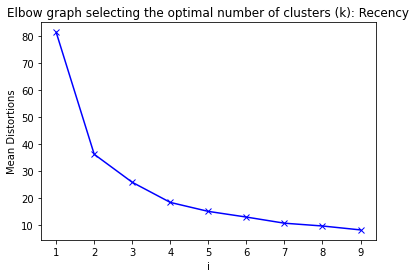

In [71]:
meanDistortions = []
no_of_clusters = range(1,10)

for i in no_of_clusters:
    clfmodel = KMeans(n_clusters=i)
    clfmodel.fit(RFM[['Recency']])
    clfmodel_pred = clfmodel.predict(RFM[['Recency']])

    meanDistortions.append(sum(np.min(cdist(RFM[['Recency']],clfmodel.cluster_centers_,'euclidean'),axis=1)) / RFM[['Recency']].shape[0])
    
#next I plot a line plot to identify the optimal point, which is the point where the line begins to curve
plt.plot(no_of_clusters,meanDistortions,'bx-')
plt.xlabel('i')
plt.ylabel('Mean Distortions')
plt.title('Elbow graph selecting the optimal number of clusters (k): Recency')
plt.show()

### Frequency

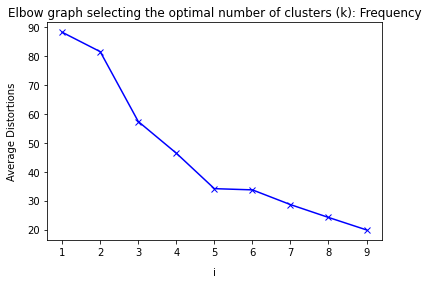

In [72]:
meanDistortions = []
no_of_clusters = range(1,10)

for i in no_of_clusters:
    clfmodel = KMeans(n_clusters=i)
    clfmodel.fit(RFM[['Frequency']])
    clfmodel_pred = clfmodel.predict(RFM[['Frequency']])

    meanDistortions.append(sum(np.min(cdist(RFM[['Frequency']],clfmodel.cluster_centers_,'euclidean'),axis=1)) / RFM[['Frequency']].shape[0])
    
plt.plot(no_of_clusters,meanDistortions,'bx-')
plt.xlabel('i',labelpad=10)
plt.ylabel('Average Distortions',labelpad=10)
plt.title('Elbow graph selecting the optimal number of clusters (k): Frequency')
plt.show()

### Monetary

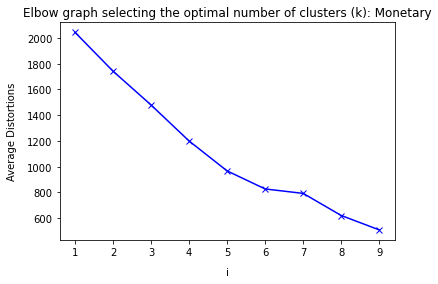

In [73]:
meanDistortions=[]
no_of_clusters=range(1,10)
for i in no_of_clusters:
    clfmodel=KMeans(n_clusters=i)
    clfmodel.fit(RFM[['Monetary']])
    clfmodel_pred=clfmodel.predict(RFM[['Monetary']])
    
    meanDistortions.append(sum(np.min(cdist(RFM[['Monetary']],clfmodel.cluster_centers_,'euclidean'),axis=1)) / RFM[['Monetary']].shape[0])
    
plt.plot(no_of_clusters,meanDistortions,'bx-')
plt.xlabel('i',labelpad=10)
plt.ylabel('Average Distortions',labelpad=10)
plt.title('Elbow graph selecting the optimal number of clusters (k): Monetary')
plt.show()

##### the optimal number of clusters for Recency, Frequency and Monetary respectively are 4,5,  and 6. Using 5 as k in our analysis proved to be an excellent choice

## Silhouette  Method

In [74]:
from sklearn.metrics import silhouette_score

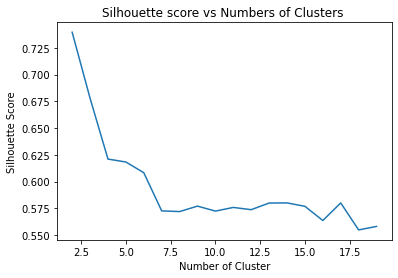

Optimal number :
2


In [75]:
silhouette  = []
no_of_cluster = range(2,20)

for i in no_of_cluster:
    model = KMeans(i,init='k-means++',n_init=10,max_iter=100,tol=0.0001, verbose=0, random_state=None, copy_x=True)
    model.fit(RFM[['Recency']])
    predict = model.predict(RFM[['Recency']])
    silhouette_score(RFM[['Recency']],predict,metric='euclidean')
    silhouette.append(silhouette_score(RFM[['Recency']],predict,metric='euclidean'))
    
plt.plot(no_of_cluster,silhouette)
plt.title("Silhouette score vs Numbers of Clusters ")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Optimal_Number=no_of_cluster[silhouette.index(max(silhouette))]
print( "Optimal number :")
print(Optimal_Number)

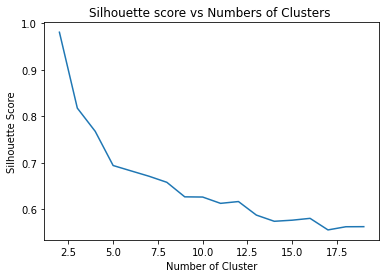

Optimal number :
2


In [76]:
silhouette  = []
no_of_cluster = range(2,20)

for i in no_of_cluster:
    model = KMeans(i,init='k-means++',n_init=10,max_iter=100,tol=0.0001, verbose=0, random_state=None, copy_x=True)
    model.fit(RFM[['Frequency']])
    predict = model.predict(RFM[['Frequency']])
    silhouette_score(RFM[['Frequency']],predict,metric='euclidean')
    silhouette.append(silhouette_score(RFM[['Frequency']],predict,metric='euclidean'))
    
plt.plot(no_of_cluster,silhouette)
plt.title("Silhouette score vs Numbers of Clusters ")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Optimal_Number=no_of_cluster[silhouette.index(max(silhouette))]
print( "Optimal number :")
print(Optimal_Number)

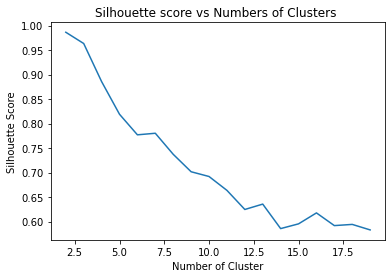

Optimal number :
2


In [77]:
silhouette  = []
no_of_cluster = range(2,20)

for i in no_of_cluster:
    model = KMeans(i,init='k-means++',n_init=10,max_iter=100,tol=0.0001, verbose=0, random_state=None, copy_x=True)
    model.fit(RFM[['Monetary']])
    predict = model.predict(RFM[['Monetary']])
    silhouette_score(RFM[['Monetary']],predict,metric='euclidean')
    silhouette.append(silhouette_score(RFM[['Monetary']],predict,metric='euclidean'))
    
plt.plot(no_of_cluster,silhouette)
plt.title("Silhouette score vs Numbers of Clusters ")
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Optimal_Number=no_of_cluster[silhouette.index(max(silhouette))]
print( "Optimal number :")
print(Optimal_Number)